# Visualisierung des MLP

## MNIST laden

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MLP-Modell definieren

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,),max_iter=100, random_state=42)
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(128,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,42


In [16]:
score = mlp.score(X_test,y_test)
print(f'Score = {score:0.2%}')

Score = 97.84%


## Visualisierung der ersten 64 Neuronen

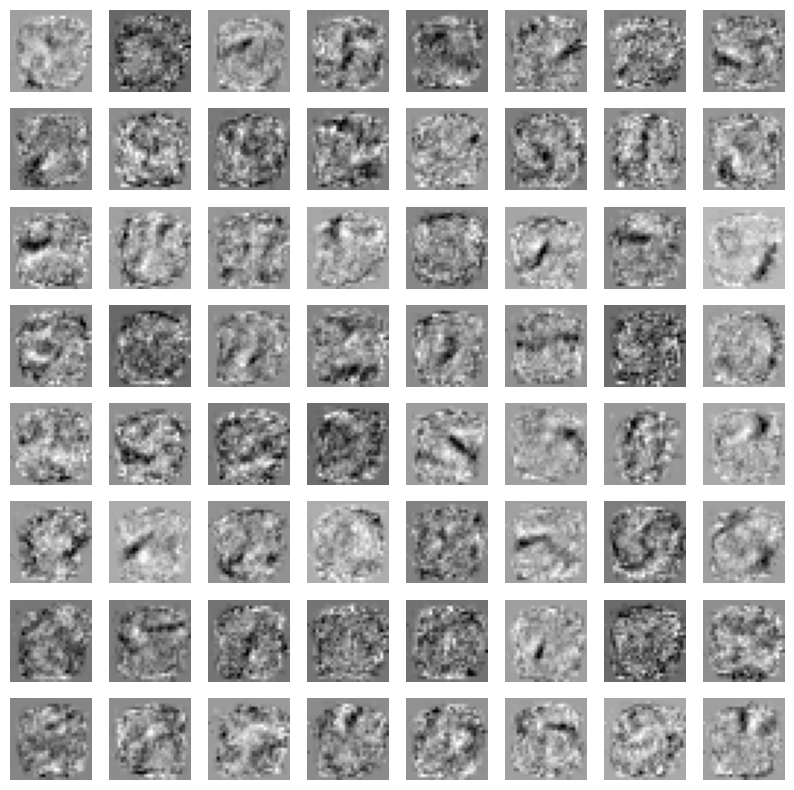

In [17]:
import matplotlib.pyplot as plt

# Gewichte der ersten Schicht extrahieren
weights = mlp.coefs_[0]  # Erste Gewichtsmatrix (784 x 128)

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < 64:  # Nur 64 Neuronen anzeigen
        ax.imshow(weights[:, i].reshape(28, 28), cmap='gray')
        ax.axis('off')

plt.show()